# Tutorial: Information Imbalance

In [1]:
import matplotlib.pyplot as plt
import numpy as np

from dadapy.plot import plot_inf_imb_plane
from dadapy.metric_comparisons import MetricComparisons

%matplotlib inline

In [2]:
%load_ext autoreload
%autoreload 2

## 3D Gaussian with small variance along $z$

In this section we define a simple dataset sampled from a 3D Gaussian distribution with a small variance along the $z$ axis.

In [3]:
# sample dataset

N = 1000

cov = np.identity(3)
cov[-1, -1] = 0.01**2 # variance along z is much smaller!
mean = np.zeros(3)
X = np.random.multivariate_normal(mean = mean, cov = cov, size = (N))



Text(0, 0.5, 'z')

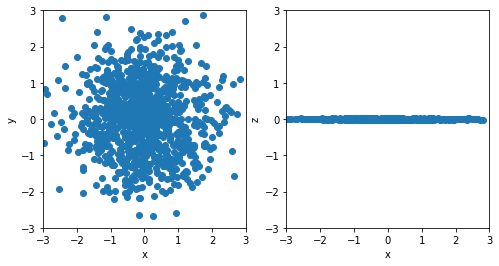

In [4]:
# plot the sampled points

fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (8, 4))

ax1.scatter(X[:, 0], X[:, 1])
ax1.set_xlim(-3, 3)
ax1.set_ylim(-3, 3)
ax1.set_xlabel('x')
ax1.set_ylabel('y')

ax2.scatter(X[:, 0], X[:, 2])
ax2.set_xlim(-3, 3)
ax2.set_ylim(-3, 3)
ax2.set_xlabel('x')
ax2.set_ylabel('z')

In [5]:
# define an instance of the MetricComparisons class

d = MetricComparisons(X)


In [6]:
# list of the coordinate names
labels = ['x', 'y', 'z']

# list of the the subsets of coordinates for which the imbalance should be computed
coord_list = [[0,], [1,], [2,], [0,1], [0,2], [1, 2]]


In [7]:
# compute the information imbalances

imbalances = d.return_inf_imb_full_selected_coords(coord_list)


total number of computations is:  6
total number of computations is:  6


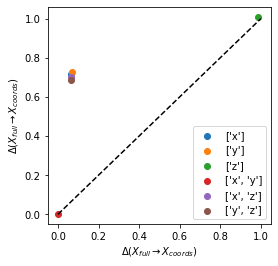

In [8]:
# plot information imbalance plane

plot_inf_imb_plane(imbalances, coord_list, labels)

From the graph above we see that the small variance along the $z$ makes the $[x, y]$ space equivalent to the $[x, y, z]$ space (red circle) and the $z$ space (green circle) is seen to be much less informative than the $x$ and $y$ spaces (bloue and orange circles).

## 4D isotropic Gaussian

In this example we explore the possibility of having a symmetrical yet partial sharing of information between two spaces. We will take the case of a dataset sampled from a 4D isotropic Gaussian.

In [9]:
# sample the dataset
N = 2000

X = np.random.normal(size = (N, 4))


In [10]:
# define an instance of the MetricComparisons class

d = MetricComparisons(X, maxk=X.shape[0]-1)

In [11]:

# compute the imbalance between the [x, y] space and the [y, z] space
imb_1common = d.return_inf_imb_two_selected_coords(coords1= [0, 1,], coords2= [1, 2])

# compute the imbalance between the [x, y, z] space and the [y, z, w] space
imb_2common = d.return_inf_imb_two_selected_coords(coords1= [0, 1, 2, ], coords2= [1, 2, 3])

print(imb_1common)
print(imb_2common)


(0.5642185, 0.571296)
(0.3162855, 0.334992)


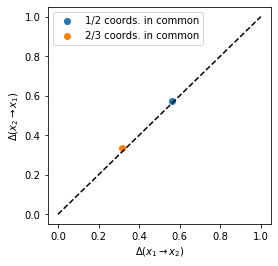

In [12]:
# plot information imbalance plane
plt.figure(figsize=(4, 4))

plt.scatter(imb_1common[0], imb_1common[1], label = '1/2 coords. in common')
plt.scatter(imb_2common[0], imb_2common[1], label = '2/3 coords. in common')

plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel(r'$\Delta(x_1 \rightarrow x_2) $')
plt.ylabel(r'$\Delta(x_2 \rightarrow x_1) $')

plt.legend()

We see that the information imbalances between the spaces $[x, y, z]$ and $[y, z, w]$ (orange circle) are lower than the imbalances between $[x, y]$ and $[y, z]$ (blue circle). 
However in both cases, since the information shared between the spaces is symmetric, the correponding point lies alog the diagonal of the information imbalance plane. 

## 10D isotropic Gaussian dataset

In this example we analayse the information imbalance for a 10D Gaussian and isotropic dataset.

In [13]:
# sample data 

N = 1000
X = np.random.normal(size = (N, 10))


In [14]:
# define an instance of the MetricComparisons class

d = MetricComparisons(X, maxk = X.shape[0]-1)


In [15]:
# define labels of coordinates and the coordinate sets we want to analyse

labels = ['x{}'.format(i) for i in range(10)]

coord_list = [np.arange(i) for i in range(1, 11)]

In [16]:
# compute the information imbalances

imbalances = d.return_inf_imb_full_selected_coords(coord_list)

total number of computations is:  10
total number of computations is:  10


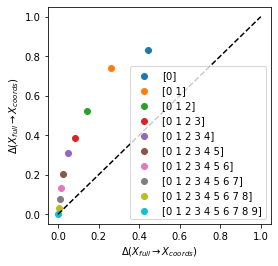

In [17]:
# plot information imbalance plane

plot_inf_imb_plane(imbalances, coord_list)

We see that all subsets of coordinates are contained in the full space and that adding coordinates progressively brings the information imbalance to zero.

## Sinusoidal function

In this section we will show that the information imbalance is capable of correctly detecting information asymmetries also in the presence of arbitrary nonlinearities.


In [18]:
# sample a noisy sinusoidal dataset

N = 1000

x1 = np.linspace(0,1, N)
x1 = np.random.uniform(0, 1, N)
x1 = np.sort(x1)
x1 = np.atleast_2d(x1).T

x2 = 5*np.sin(x1*25)+np.random.normal(0, .5, (N, 1))

X = np.hstack([x1, x2])

Text(0, 0.5, '$x2$')

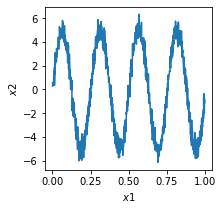

In [19]:
# plot the data, note that the variance is much higher along x2 than along x1
plt.figure(figsize = (3, 3))
plt.plot(x1, x2);
plt.xlabel(r'$x1$')
plt.ylabel(r'$x2$')

In [20]:
# define an instance of the MetricComparisons class

d = MetricComparisons(X, maxk = X.shape[0]-1)


In [21]:
imb01, imb10 = d.return_inf_imb_two_selected_coords([0], [1])

In [22]:
print(imb01, imb10)

0.20694200000000001 0.9903500000000001


Text(0, 0.5, '$\\Delta(x_2 \\rightarrow x_1) $')

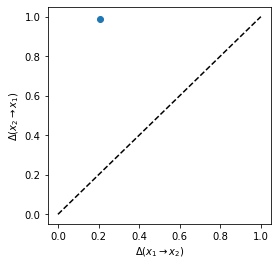

In [23]:
# plot information imbalance plane
plt.figure(figsize=(4, 4))

#plot_inf_imb_plane(imbalances, coord_list, labels)
plt.scatter(imb01, imb10)

plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel(r'$\Delta(x_1 \rightarrow x_2) $')
plt.ylabel(r'$\Delta(x_2 \rightarrow x_1) $')
    

The information imbalance from $x_1$ to $x_2$ is much lower than that from $x_2$ to $x_1$. The $x_1$ space is detected as more informative, in spite of the much larger variance of the data along $x_2$.